# Home loan sanction data - exploratory data analysis

### Loac Sanction Amount Data - The dataset consists of information about 1000 customers applied for the home loan.

* Customer ID - 
* Name- 
* Gender - 
* Age - 
* Income (USD) - 
* Income Stability - 
* Profession
* Type of Employment
* Location
* Loan Amount Request (USD)
* Current Loan Expenses (USD)
* Expense Type 1
* Expense Type 2
* Dependents
* Credit Score
* No. of Defaults
* Has Active Credit Card
* Property ID
* Property Age
* Property Type
* Property Location 
* Co-Applicant
* Property Price
* Loan Sanction Amount (USD)'

In [79]:
# importing the required libraries

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [10]:
rcParams['figure.figsize'] = 25,18

In [438]:
## Kindly change the below cells from markdown to code and execute it 

In [38]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)

df=pd.read_csv("data_set.csv")

df.head()


,Customer ID,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-40730,M,33,2731.31,Low,Working,NaN,Semi-Urban,74167.78,370.02,2.0,635.48,Inactive,2731.31,3,Rural,1,117586.49,0.00
1,C-17328,M,45,2480.23,Low,State servant,IT staff,Urban,53423.39,173.75,3.0,NaN,Unpossessed,2480.23,2,Rural,1,60652.57,37396.37
2,C-31881,M,18,3031.68,Low,Commercial associate,Laborers,Urban,93540.25,957.45,2.0,709.87,Inactive,3031.68,3,Rural,1,165114.92,60801.16
3,C-4884,F,59,1297.93,Low,Working,Accountants,Urban,72452.30,791.52,4.0,740.95,Active,1297.93,3,Urban,1,120739.20,50716.61
4,C-28839,F,41,2165.17,Low,Commercial associate,NaN,Semi-Urban,59061.80,280.79,2.0,724.65,Inactive,2165.17,4,Urban,1,-999.00,41343.26


#### Display the categorical and Numerical columns

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  1000 non-null   object 
 1   Gender                       997 non-null    object 
 2   Age                          1000 non-null   int64  
 3   Income (USD)                 827 non-null    float64
 4   Income Stability             941 non-null    object 
 5   Profession                   1000 non-null   object 
 6   Type of Employment           745 non-null    object 
 7   Location                     1000 non-null   object 
 8   Loan Amount Request (USD)    1000 non-null   float64
 9   Current Loan Expenses (USD)  997 non-null    float64
 10  Dependents                   906 non-null    float64
 11  Credit Score                 945 non-null    float64
 12  Has Active Credit Card       935 non-null    object 
 13  Property Age       

inference :
    - There are a total of 8 columns with float values, 3 columns with integer values and 8 columns with categorical values.

#### Check if there any mismatch in the data values and the Data type of the column. Convert the columns in other datatype if required 

In [6]:
df.head()

,Customer ID,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,Has Active Credit Card,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-40730,M,33,2731.31,Low,Working,NaN,Semi-Urban,74167.78,370.02,2.0,635.48,Inactive,2731.31,3,Rural,1,117586.49,0.00
1,C-17328,M,45,2480.23,Low,State servant,IT staff,Urban,53423.39,173.75,3.0,NaN,Unpossessed,2480.23,2,Rural,1,60652.57,37396.37
2,C-31881,M,18,3031.68,Low,Commercial associate,Laborers,Urban,93540.25,957.45,2.0,709.87,Inactive,3031.68,3,Rural,1,165114.92,60801.16
3,C-4884,F,59,1297.93,Low,Working,Accountants,Urban,72452.30,791.52,4.0,740.95,Active,1297.93,3,Urban,1,120739.20,50716.61
4,C-28839,F,41,2165.17,Low,Commercial associate,NaN,Semi-Urban,59061.80,280.79,2.0,724.65,Inactive,2165.17,4,Urban,1,-999.00,41343.26


In [7]:
df.dtypes

Customer ID                     object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Dependents                     float64
Credit Score                   float64
Has Active Credit Card          object
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

inference :
    The datatype of all the columns are correctly assigned.
    Hence there is no need of chsnging te datatypes of any column.

##### Split the Dataset into Train and Test. Also give us the reason behind your split 
    
   Assume `'Loan Sanction Amount (USD)'` Column to be the Target variable 

In [12]:
# Identifying the dependent and independent variables.
X = df.drop('Loan Sanction Amount (USD)',axis = 1)
Y = df['Loan Sanction Amount (USD)']

# Performing train test split on the dependent and independent variables
# we'll be splitting the data in the ratio of 70:30

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.3,random_state=1)

print('Dimensions of xtrain set :',xtrain.shape)
print('Dimensions of xtest set:',xtest.shape)
print('Dimensions of ytrain set:',ytrain.shape)
print('Dimensions of ytest set:',ytest.shape)

Dimensions of xtrain set : (700, 18)
Dimensions of xtest set: (300, 18)
Dimensions of ytrain set: (700,)
Dimensions of ytest set: (300,)


####  Display percentage of negative values in each column rounded upto two decimal places

In [26]:
round((df.isnull().sum()/len(df))*100,2)

Customer ID                     0.0
Gender                          0.3
Age                             0.0
Income (USD)                   17.3
Income Stability                5.9
Profession                      0.0
Type of Employment             25.5
Location                        0.0
Loan Amount Request (USD)       0.0
Current Loan Expenses (USD)     0.3
Dependents                      9.4
Credit Score                    5.5
Has Active Credit Card          6.5
Property Age                   18.3
Property Type                   0.0
Property Location               1.6
Co-Applicant                    0.0
Property Price                  0.0
Loan Sanction Amount (USD)      1.1
dtype: float64

#### Determine the presence of invalid/garbage values in the dataset and replace them with NaN 

In [24]:
# let's check the object columns to see if they have any garbage values

print('unique values in Gender:',df['Gender'].unique(),'\n')
print('unique values in income stability:',df['Income Stability'].unique(),'\n')
print('unique values in Profession:',df['Profession'].unique(),'\n')
print('unique values in Type of Employment:',df['Type of Employment'].unique(),'\n')
print('unique values in Location:',df['Location'].unique(),'\n')
print('unique values in Has Active Credit Card:',df['Has Active Credit Card'].unique(),'\n')
print('unique values in Property Location:',df['Property Location'].unique())

unique values in Gender: ['M' 'F' nan] 

unique values in income stability: ['Low' 'High' nan] 

unique values in Profession: ['Working' 'State servant' 'Commercial associate' 'Pensioner'] 

unique values in Type of Employment: [nan 'IT staff' 'Laborers' 'Accountants' 'Sales staff' 'Realty agents'
 'Managers' 'Core staff' 'Cooking staff' 'High skill tech staff'
 'Medicine staff' 'Drivers' 'Private service staff' 'HR staff'
 'Security staff' 'Cleaning staff' 'Low-skill Laborers'
 'Waiters/barmen staff' 'Secretaries'] 

unique values in Location: ['Semi-Urban' 'Urban' 'Rural'] 

unique values in Has Active Credit Card: ['Inactive' 'Unpossessed' 'Active' nan] 

unique values in Property Location: ['Rural' 'Urban' 'Semi-Urban' nan]


<b>inference :</b>
   - Looking at the unique values present in the categorical columns we can say that the information provided in these categories of each column carry a useful information that seems helpful for the analysis process.
   - Although there are columns with nan values their weight is very low.
   - It can be concluded that these columns do not hold any invalid /garbage values that require to be replaced as null.

In [25]:
# for numerical columns

df.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,1000.000000,827.000000,1000.000000,997.000000,906.000000,945.000000,817.000000,1000.000000,1000.000000,1000.000000,989.000000
mean,40.560000,2533.808573,91070.250310,402.216189,2.251656,738.511418,2539.634688,2.427000,-8.126000,135434.037560,49255.589090
std,15.870484,1551.013383,60551.939341,250.256907,0.938214,70.830152,1554.486748,1.104487,94.476282,94793.575726,48213.792988
min,18.000000,418.900000,6108.050000,-999.000000,1.000000,587.890000,418.900000,1.000000,-999.000000,-999.000000,-999.000000
25%,26.000000,1674.065000,41640.432500,244.010000,2.000000,682.020000,1674.420000,1.000000,1.000000,60690.737500,0.000000
50%,40.000000,2182.850000,76155.505000,373.960000,2.000000,738.270000,2186.570000,2.000000,1.000000,113590.640000,37605.580000
75%,56.000000,2982.360000,125682.332500,521.490000,3.000000,794.340000,2994.490000,3.000000,1.000000,186343.932500,77314.790000
max,65.000000,25828.610000,383386.760000,1939.270000,5.000000,880.660000,25828.610000,4.000000,1.000000,607590.330000,287540.070000


- numerical columns possess high number of unique values as they can be distinct for each individual, especially in finance sector as the transactions,incomes, credit scores are different for different people.
- Here we can see that columns Age,income(usd), loan amount request(usd), credit score, property age, co-applicant, loan sanction amount have a pretty high standard deviation showing a high density of distinct datapoints in the said columns.
- Unique values of these columns cannot be replaced or considered invalid as they are distinct and unique to the applicant.

In [28]:
# let's check the remaining columns

print('unique values of dependents:',df['Dependents'].unique(),'\n')
print('unique values of Property type :',df['Property Type'].unique(),'\n')
print('unique values of co-applicants:',df['Co-Applicant'].unique())

unique values of dependents: [ 2.  3.  4. nan  1.  5.] 

unique values of Property type : [3 2 4 1] 

unique values of co-applicants: [   1    0 -999]


- The above columns are the columns that are in numerical form but provide information in categories
- The column co-applicant displays the number of co-applicants alongside the primary applicant for the loan. AS seen thsst one of the values displays -999 which provides no real inputs and can be considered as garbage.

In [29]:
# to relpace the garbage values in co-applicant

df['Co-Applicant'] = df['Co-Applicant'].replace(-999,np.nan)

In [30]:
print('unique values of co-applicantsc after replacement:',df['Co-Applicant'].unique())

unique values of co-applicantsc after replacement: [ 1.  0. nan]


#### Display the %of missing values in each column.

In [18]:
# firstly let's identify the missing values

(df.isnull().sum()/len(df))*100

Customer ID                     0.0
Gender                          0.3
Age                             0.0
Income (USD)                   17.3
Income Stability                5.9
Profession                      0.0
Type of Employment             25.5
Location                        0.0
Loan Amount Request (USD)       0.0
Current Loan Expenses (USD)     0.3
Dependents                      9.4
Credit Score                    5.5
Has Active Credit Card          6.5
Property Age                   18.3
Property Type                   0.0
Property Location               1.6
Co-Applicant                    0.0
Property Price                  0.0
Loan Sanction Amount (USD)      1.1
dtype: float64

inference : 
- It can be observed that columns income(17.3%),gender(0.3%), income stability(5.9%), Types of employment(25.5%), Dependents(9.4%), credit score(5.5%), Has Active Credit Card(6.5%), Property Age(18.3%), property location(1.6%), Loan Sanction Amount(1.1%) have null values present inside them.


- Since the presence of null values in these columns is on a lower side replacement with median,mean,mode would be a good choice, and they won't create much of difference with the original summaries of the data.

#### Replace missing values with appropriate values

In [58]:
# for categorical columns we will replce it with mode.

df['Gender'] = df['Gender'].fillna(df['Gender'].mode())
df['Income Stability'] = df['Income Stability'].fillna(df['Income Stability'].mode())
df['Type of Employment'] = df['Type of Employment'].fillna(df['Type of Employment'].mode())
df['Has Active Credit Card'] = df['Has Active Credit Card'].fillna(df['Has Active Credit Card'].mode())
df['Property Location'] = df['Property Location'].fillna(df['Property Location'].mode())

In [34]:
# for numerical column null values will be replaced by median.

df['Income (USD)'] = df['Income (USD)'].replace(np.nan,df['Income (USD)'].median())
df['Dependents'] = df['Dependents'].replace(np.nan,df['Dependents'].median())
df['Credit Score'] = df['Credit Score'].relplace(np.nan,df['Credit Score'].median())
df['Property Age'] = df['Property Age'].replace(np.nan,df['Property Age'].median())
df['Loan Sanction Amount (USD)'] = df['Loan Sanction Amount (USD)'].replace(np.nan,df['Loan Sanction Amount (USD)'].median())

#### Plot correlation Heat map for the dataset and indetify the features impacting Target variables

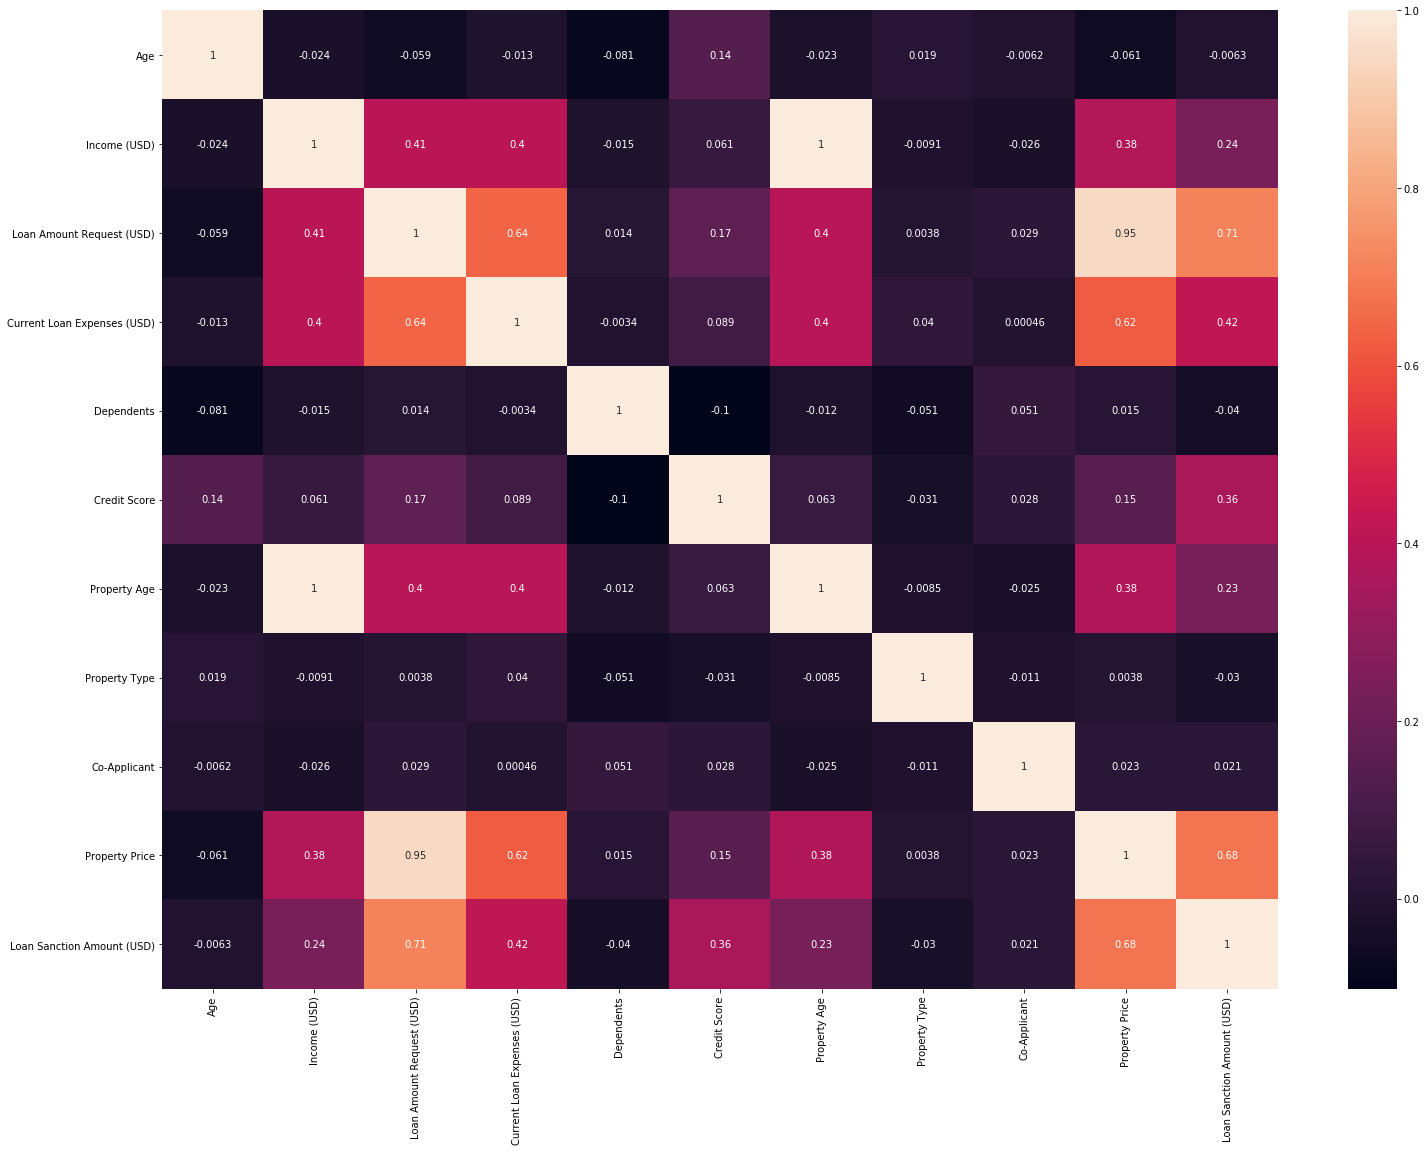

In [40]:
sns.heatmap(df.corr(),annot = True)
plt.show()

- Target Variable Loan Sanction amount a high correlation with the columns property price(0.68), loan amount request (usd)(0.71) displaying that these variables highly affect the target variable.
- variables current loan expenses(usd)(0.42), creditscore(0.36) display a moderate corelation with the target vairiable showing a moderate impact as well.
- The other variables show a ver low relation with target variable.
- Age displays a negative correlation with the target variable. which can be interpreted as age not being a major factor affecting the loan sanction amount.

Multicollinearity:

   - Majority of the columns display a very low multi correlation with each other.
   - Columns loan amount request and current loan expenses, property price and current loan expenses, loan amount request and current loann prices share a comparatively higher correlation with each other.

### Identiy top 5 and bottom 5 employment type wrt income and visualise it using appropriate plot 


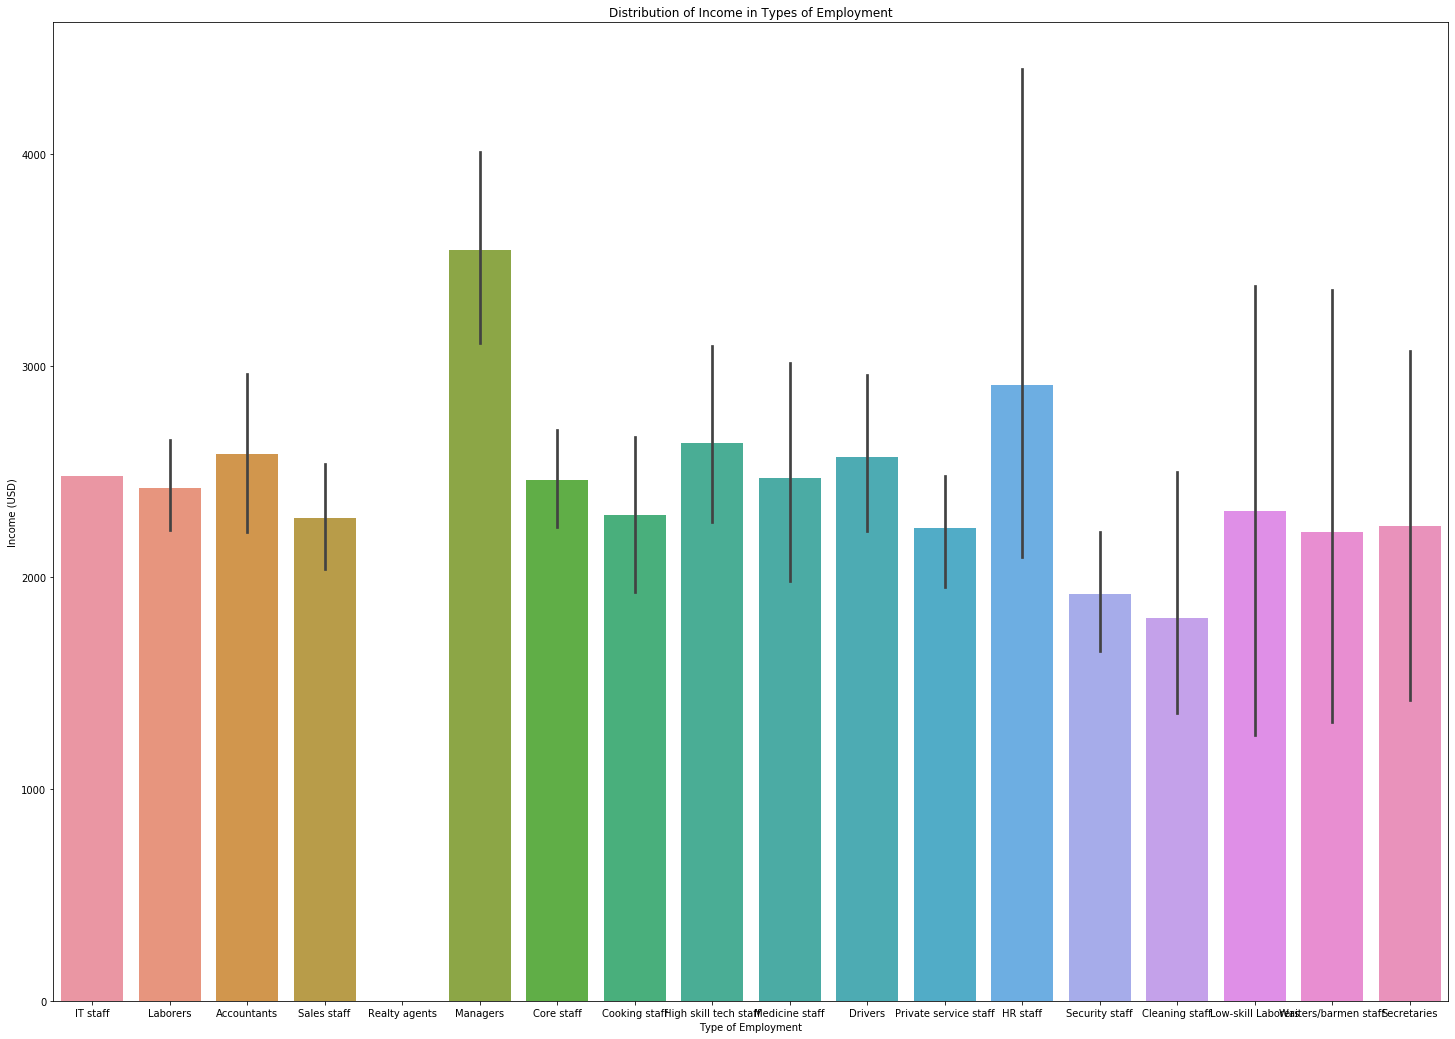

In [51]:
sns.barplot(df['Type of Employment'],df['Income (USD)'])
plt.title('Distribution of Income in Types of Employment')
plt.show()

inference :

   - The top 5 employment type with higher income are managers, HR staff, Accountants, High skill tech staff, & medicine staff
   - The bottom 5 types are cleaning staff, security staff, private service staff, waiters/barmen and sales staff

### Identify the trend between loan between features below and write their inferences 
- Current loan Expenses and Loan Sanction Amount
- Credit score and Loan Sanction Amount



In [52]:
df.columns

Index(['Customer ID', 'Gender', 'Age', 'Income (USD)', 'Income Stability',
       'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Dependents', 'Credit Score', 'Has Active Credit Card', 'Property Age',
       'Property Type', 'Property Location', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)'],
      dtype='object')

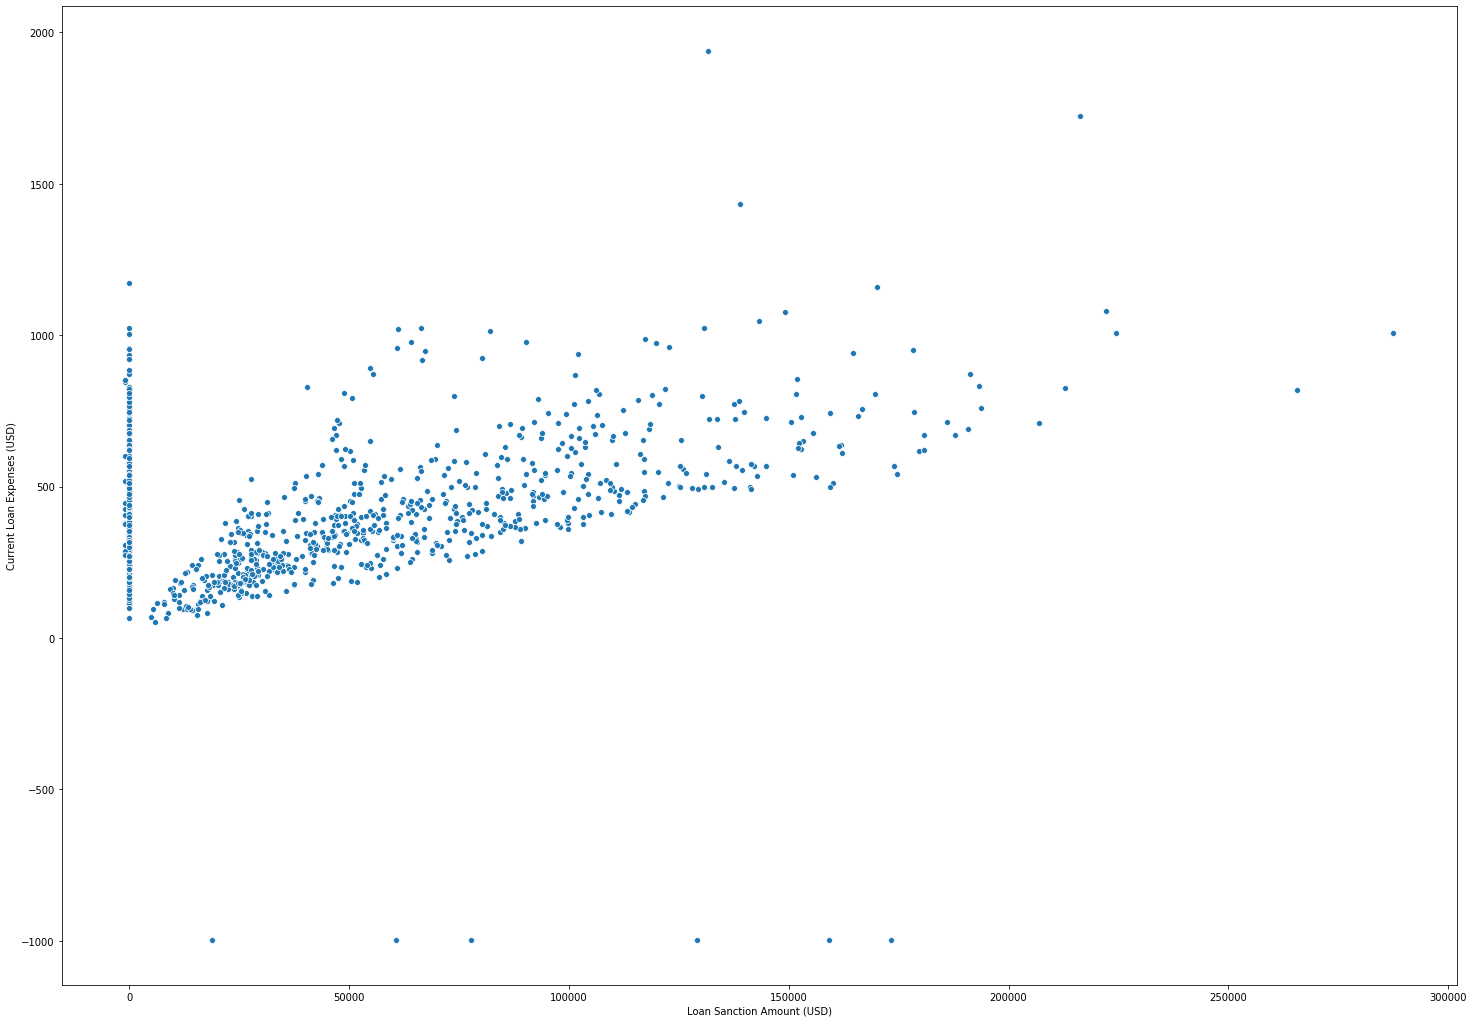

In [60]:
# for current loan expenses and loan sanction amount

sns.scatterplot(df['Loan Sanction Amount (USD)'],df['Current Loan Expenses (USD)'],)
plt.show()

inference :
    
    - It can be obersved that there are a few negative values present.
    - A low loan sanction amount shows a trend of low current loan expenses.
    - Applicants that show an increase in current loan expenses also display an higher loan sanction amount.

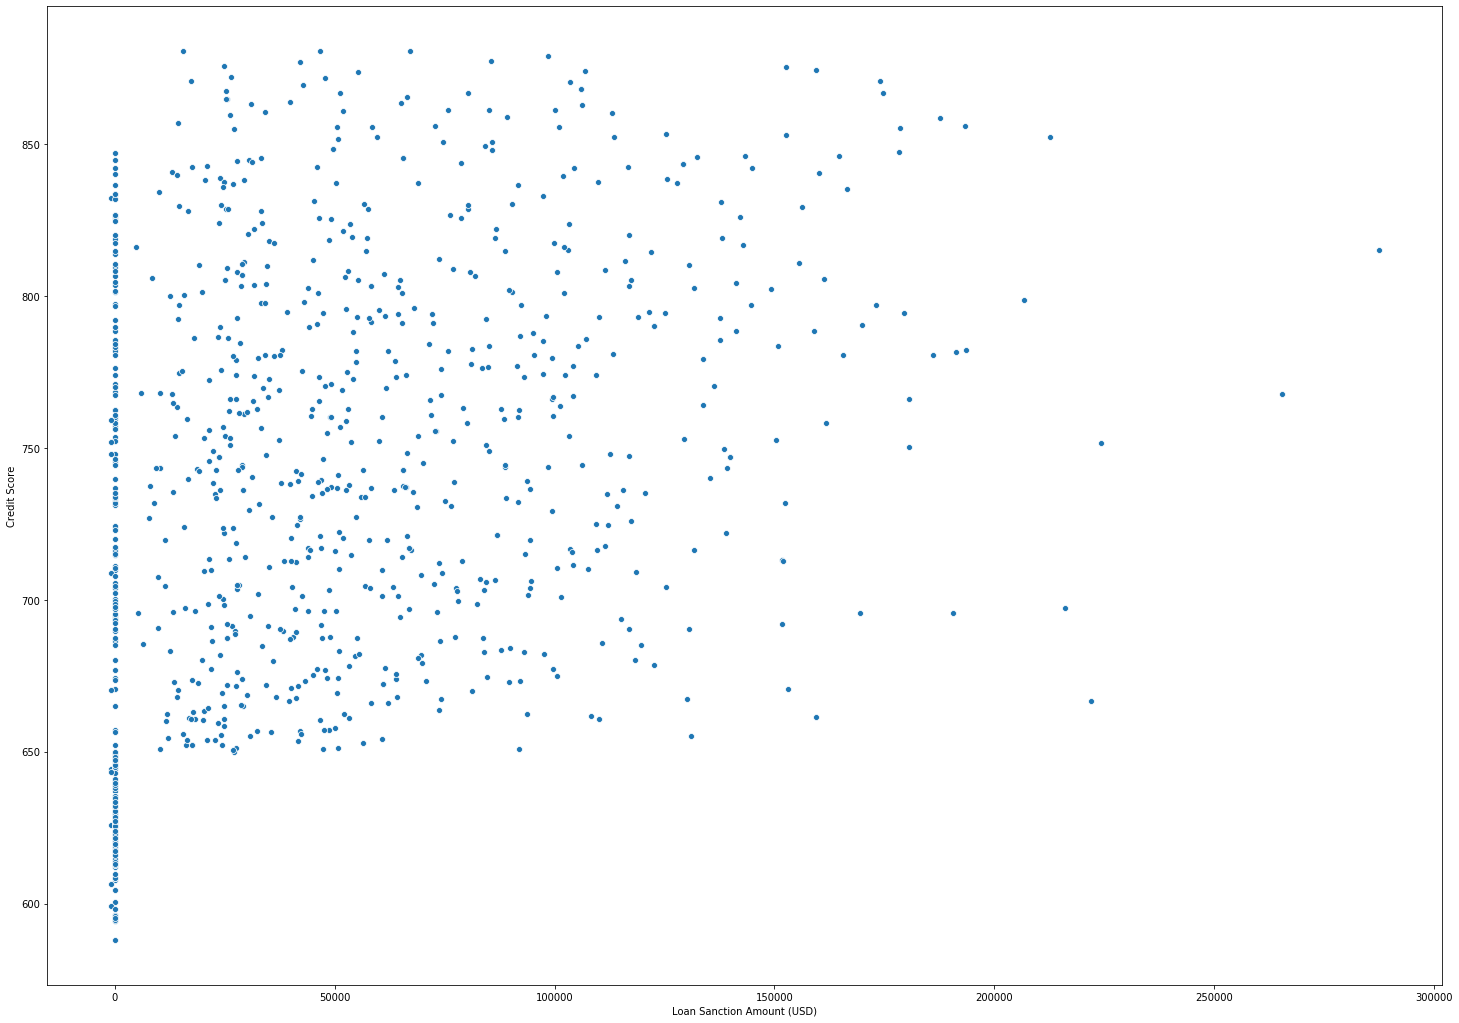

In [63]:
sns.scatterplot(df['Loan Sanction Amount (USD)'],df['Credit Score'])
plt.show()

inference : 

    - There are seems to be no applicant with a negative credit score.
    - The loan sanction amount is more dense upto 5000(usd) and credit score of 650 to 800.
    - There are observations of higher loan sanction amount for applicants with a comparatively lower credit score.


 ### Identify percentage of peaple in has active credit card class as per each location and using appropriate plot visualize it.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1288267b70>],
      dtype=object)

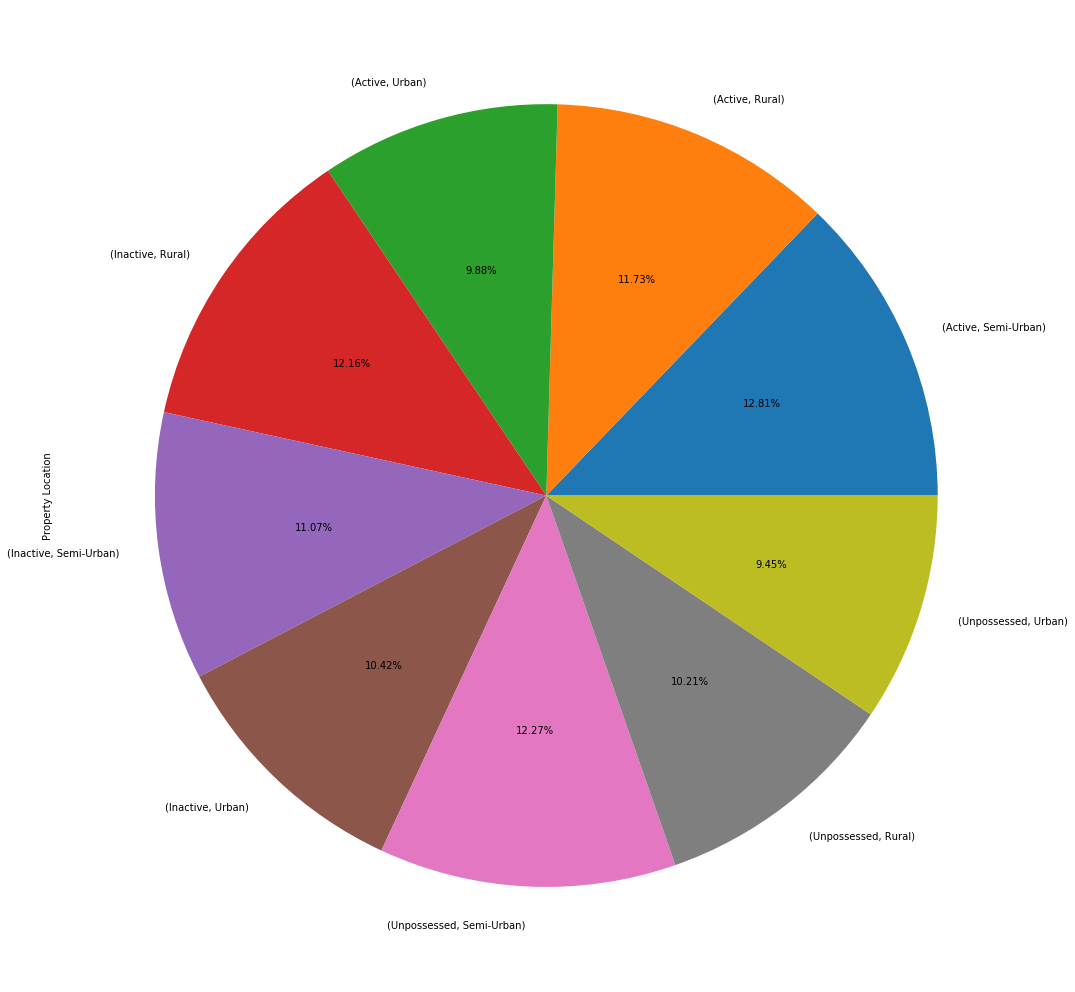

In [68]:
df.groupby('Has Active Credit Card')['Property Location'].value_counts().plot(kind = 'pie',autopct='%1.2f%%',subplots = True)

inference:
    
    - From the above plot we can identify the percentage of active credit card possessed by users in different locations.
    - Semi-urban locations have the higher percentage of unposessed creditcards(12.27%).
    - Semi-urban however also has the highest percentage of active cards(12.81%).
    - Rural areas have a higher percentage of inactive cards(12.16%).

#### A. Make a distribution plot for all the features and provide insights on it

In [72]:
df_num = df.select_dtypes(include = np.number)

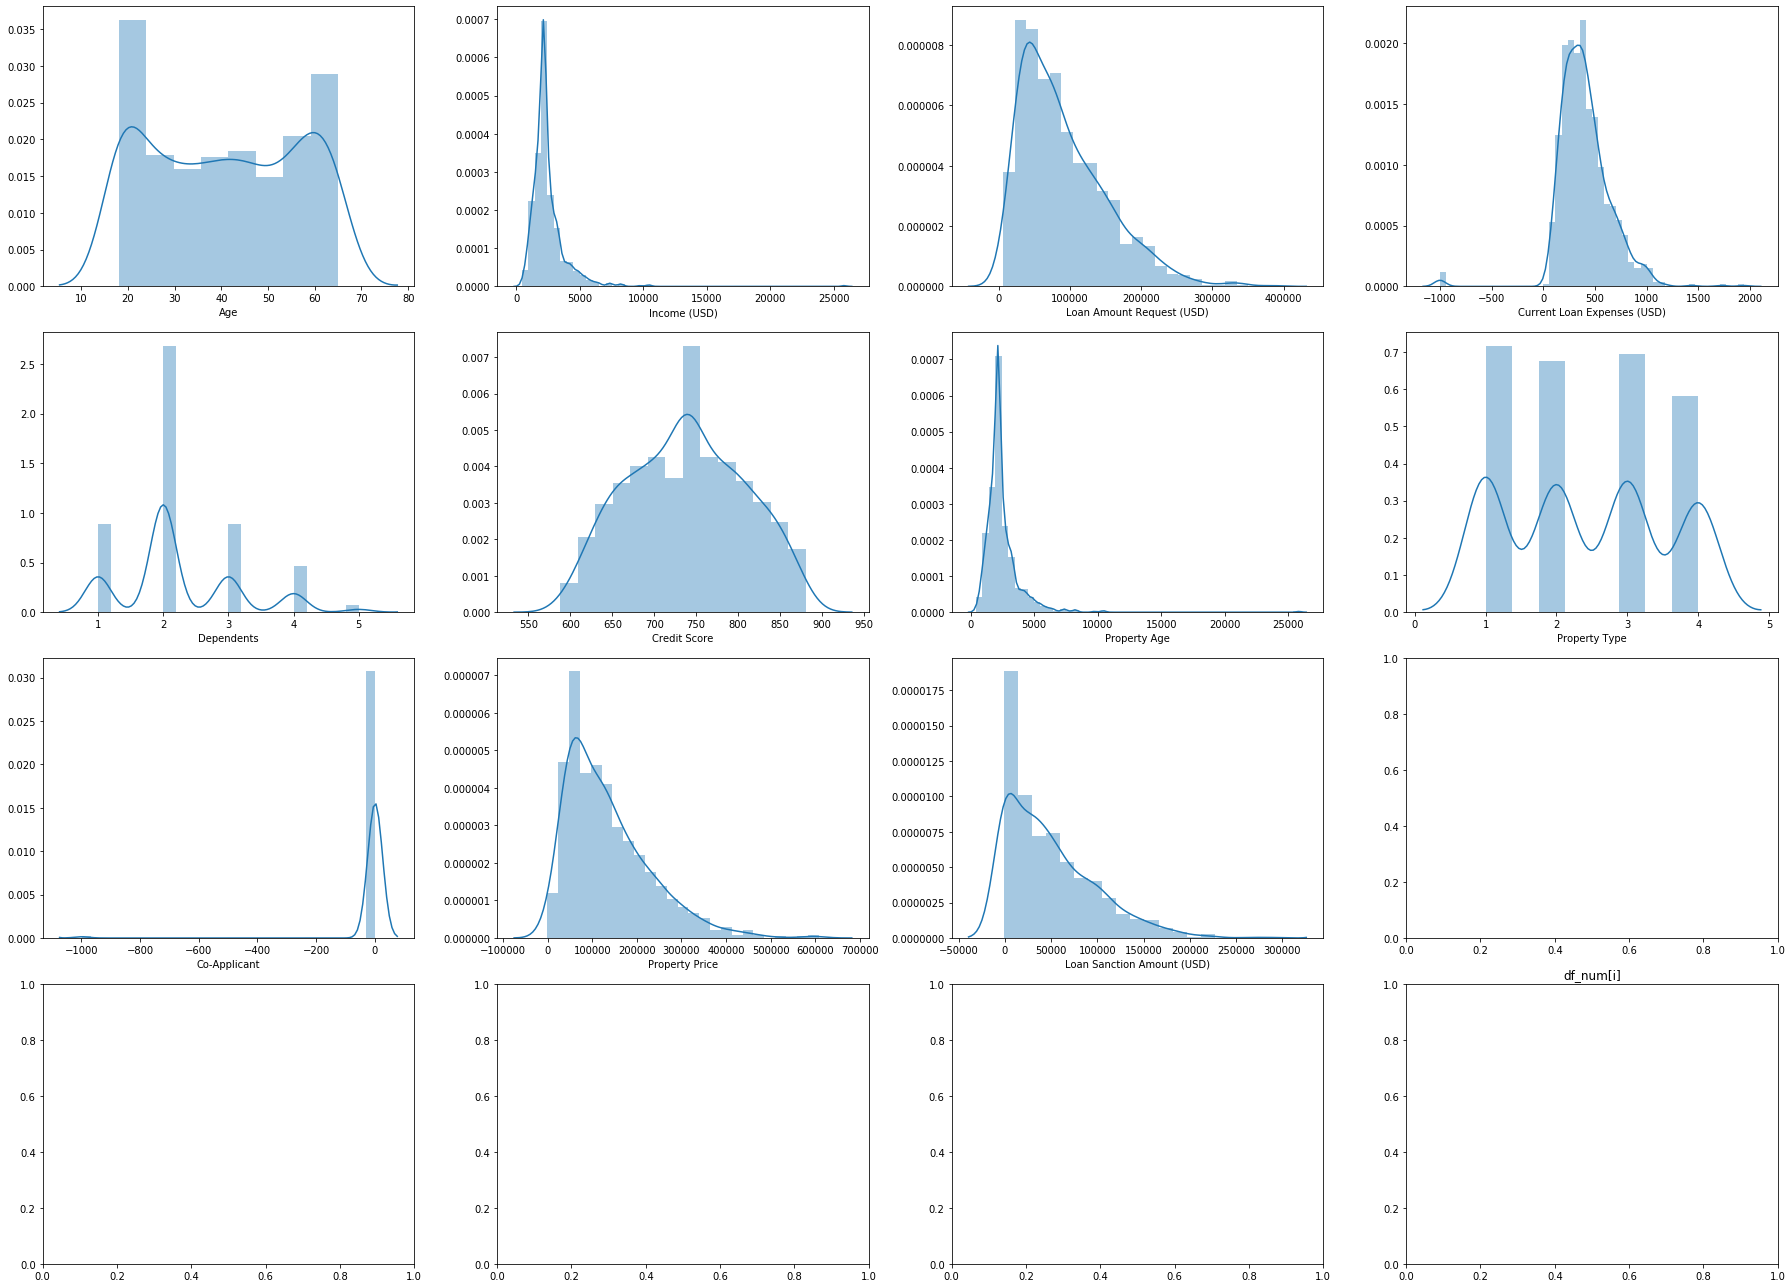

In [78]:
# for A:

fig, ax = plt.subplots(4,4,figsize = (25,18))

for i, subplots in zip(df_num.columns,ax.flatten()):
    sns.distplot(df_num[i],ax = subplots)
    plt.title('df_num[i]')
plt.tight_layout()
plt.show()

inference:
  - loan sanction amount, property price, property age,income have a right skewed distribuiton
  - co_applicant has a left skewed distribution displaying more datapoints density in the right hand side of the column.
  - age, credit scire are displaying somewhat of a normal distribution.
  - property type has a varying distribution as it displays different types of properties in numerical form.

####  Write a code for following. 
    - Divide the Age into bins such that now there will be 3 categories of ages with labels as Young, middle aged and old.
    - Make a new column Age_Groups. 
  

In [113]:
def age(x):
    for df['Age'] in range(18,35):
        return 'young'
    for df['Age'] in range (36,60):
        return 'middleage'
    for df['Age'] in range(60,65):
        return 'old'
df['agegroups'] = df['Age'].apply(age)    

#### Find the average price of the property based on its type, Propertly location also use a plot to show the relationship  

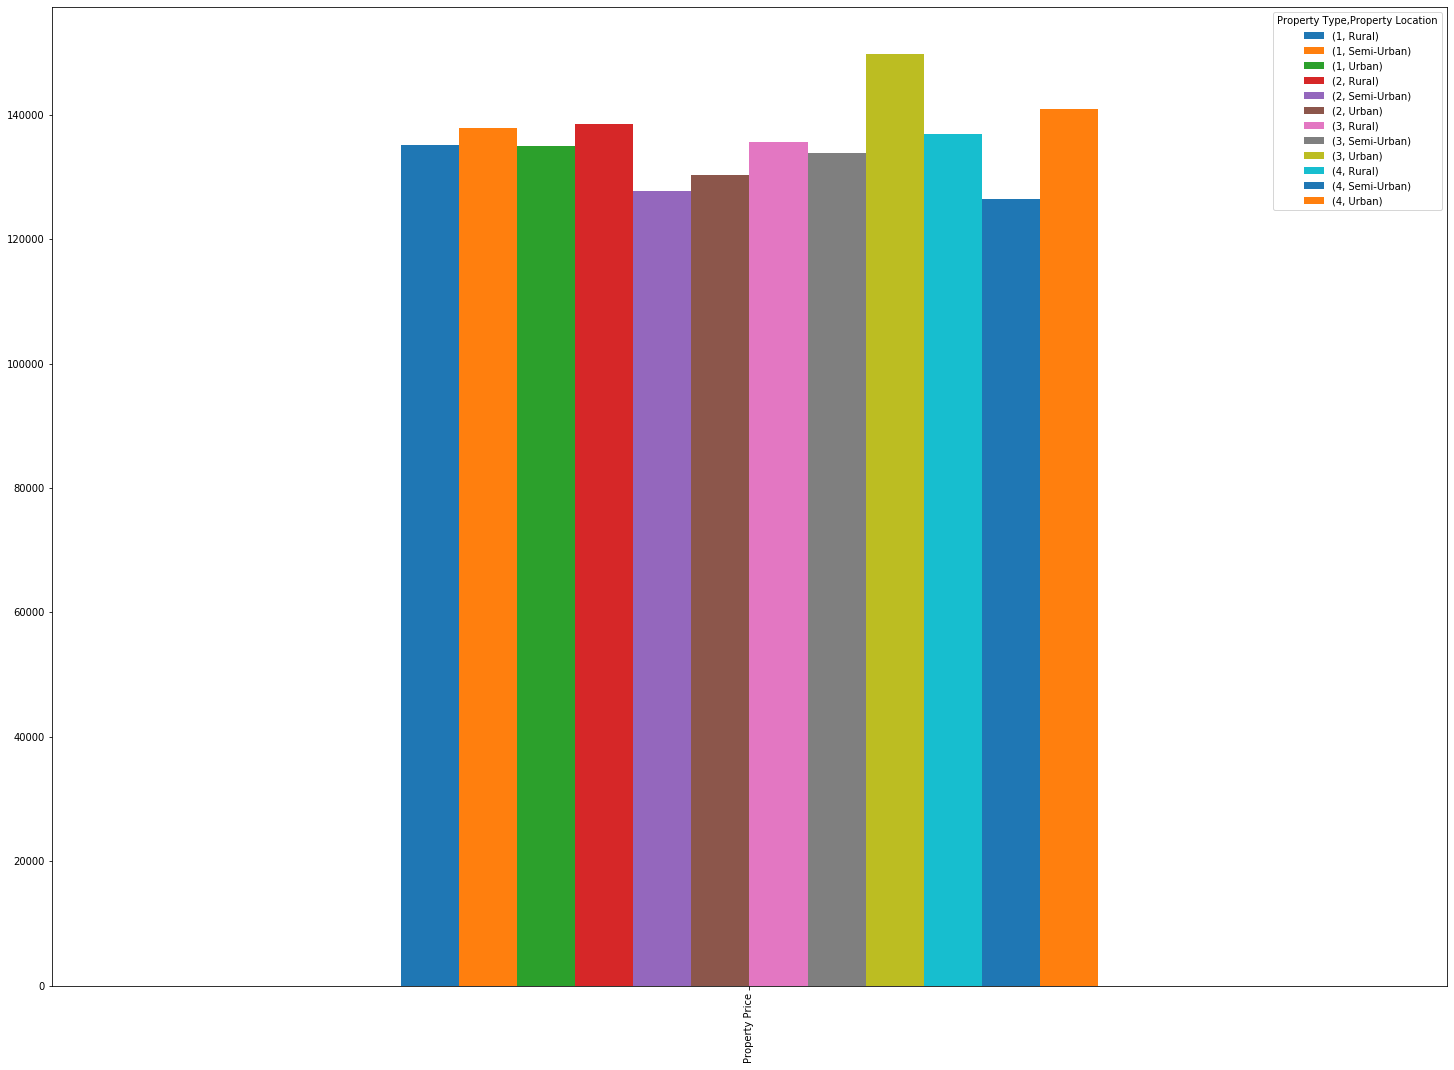

In [97]:
# for C:

pd.pivot_table(df,columns = ['Property Type','Property Location'],values= 'Property Price',aggfunc=np.mean).plot(kind = 'bar')
plt.show()


#### A. Explain Skewness and Kurtosis 


In [98]:
print('Skewness of the data :','\n',df.skew())

Skewness of the data : 
 Age                             0.018529
Income (USD)                    5.278678
Loan Amount Request (USD)       1.147585
Current Loan Expenses (USD)    -0.227331
Dependents                      0.678693
Credit Score                    0.015066
Property Age                    5.294378
Property Type                   0.071486
Co-Applicant                  -10.413517
Property Price                  1.280426
Loan Sanction Amount (USD)      1.122548
dtype: float64


inference :

- Skewness of the data tells us the distribution of the data.
- age, credit score, property type have a skew ness between -0.5 to 0.5v which means that the data is somewhat normally distributed.
- income, loan amount request, property age, dependents, property price, loan sanction amount have a skewness of greater than 0.5 and are positive, this can be interpreted as the these columns having more concentration of data on the lower values.
- current loan expenses, coapplicant have a negative skewness, showing they are more fls\atter at the left side of the plot and have a higher concentration of datapoints in the higher values.

In [99]:
print(df.kurt())

Age                             -1.371500
Income (USD)                    63.729454
Loan Amount Request (USD)        1.382061
Current Loan Expenses (USD)      8.208044
Dependents                       0.093970
Credit Score                    -0.950985
Property Age                    63.857926
Property Type                   -1.326366
Co-Applicant                   106.656030
Property Price                   2.061383
Loan Sanction Amount (USD)       1.209086
dtype: float64


inference :

- Kurtosis of the data helps s in determining the prexence of outliers in the data.
- They can be distinguished in three categories leptokurtic, platykurtic, mesokurtic.
  - leptokurtic - have a kurtosis of greater than 3. They display high presence of outliers in the variables.have thicker tails(kernel distribution curve). (income,current loan expenses,property age,coapplicants )
  - Mesokurtic - they have a kurtosis = 3 or closer to 3, displaying normal distribution of the datapoints.
  - platykurtic - they have kurtosis less than 3. datapoints in these variables are mostly closer to the means but still have lower density. (age,loan amount request,dependents,credit score, property type,property price, loan sanction amount)



####  If the outliers are in Income and data distribution is skewed. Apply the log to reduce the variation that the outlier values cause in the data set. 


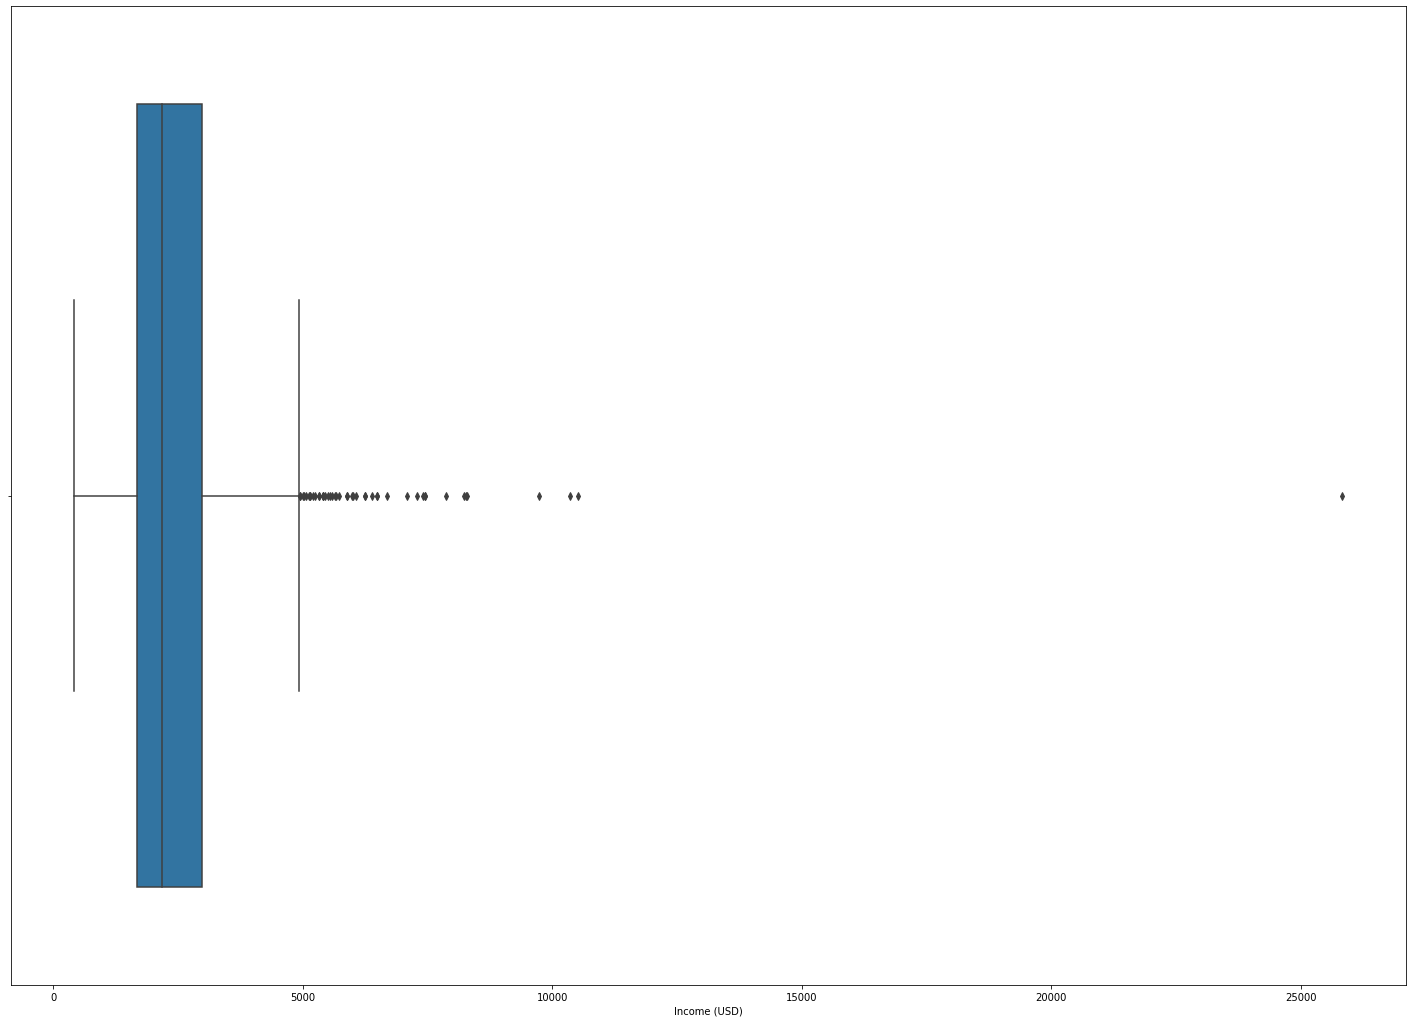

In [100]:
# for C:

sns.boxplot(df['Income (USD)'])

In [101]:
# as seen the above figure outliers are present in the income column
# we've seen earlier that income also displays skewness in the data
# hence we'll transform using log transformation to normalise the data.

df['Income (USD)'] = np.log(df['Income (USD)'])

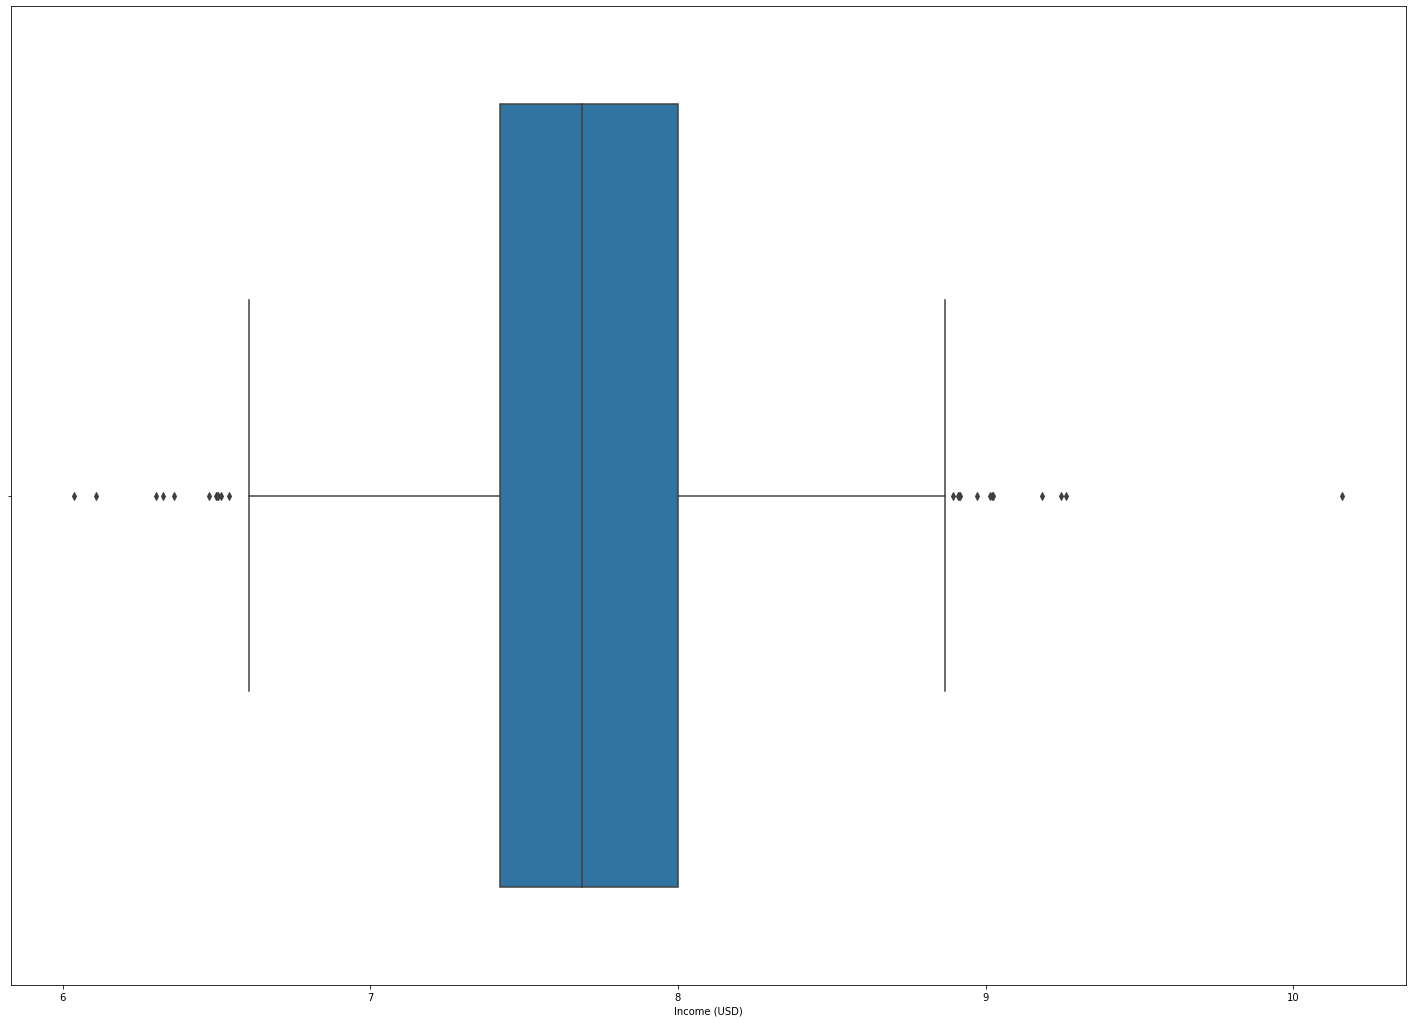

In [102]:
sns.boxplot(df['Income (USD)'])